In [ ]:
!pip install pandas
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/btpop.xlsx')

# Now you can work with the data in the DataFrame
print(df.head()) # Example: Print the first 5 rows of the DataFrame

     LL     PI  %S  %FA     M   A/B  Na/Al  Si/Al   OMC%  MDD(kn/m3)  \
0  37.7  14.07   8   12  12.0  0.65   0.49   2.12  19.05      16.562   
1  37.7  14.07   6   10  12.0  0.65   0.49   2.12  19.05      16.562   
2  37.7  14.07   5    7  12.0  0.65   0.49   2.12  19.05      16.562   
3  37.7  14.07   3    5  12.0  0.65   0.49   2.12  19.05      16.562   
4  37.7  14.07   2    2  12.0  0.65   0.49   2.12  19.05      16.562   

   UCS (28day MPa)  
0            5.855  
1            2.597  
2            0.120  
3            0.097  
4            0.053  


Dataset Loaded Successfully


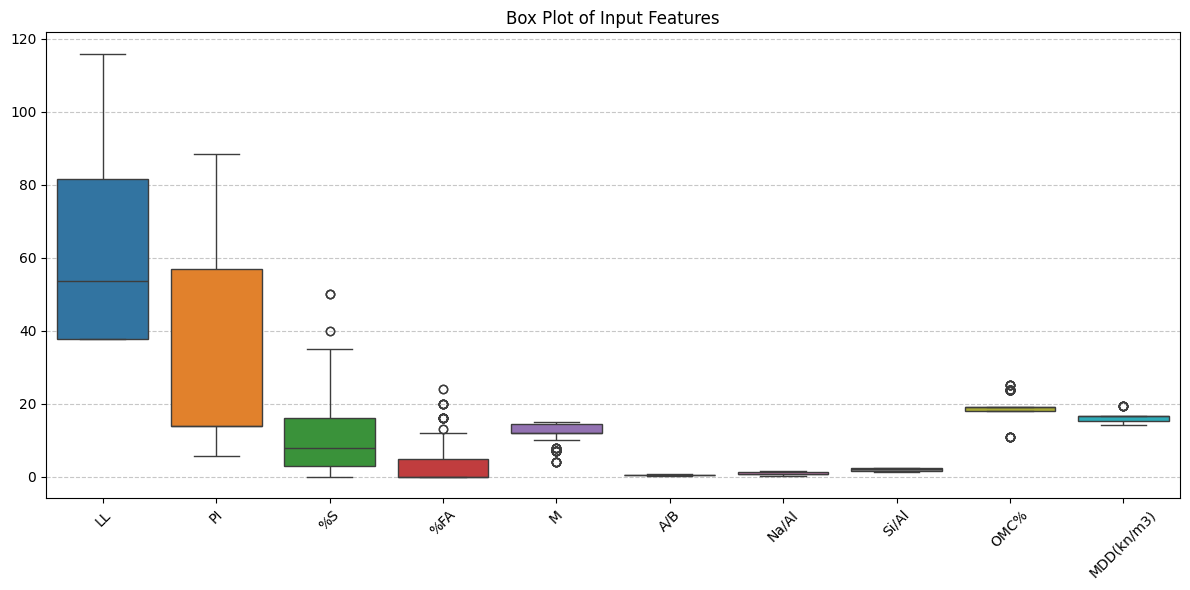

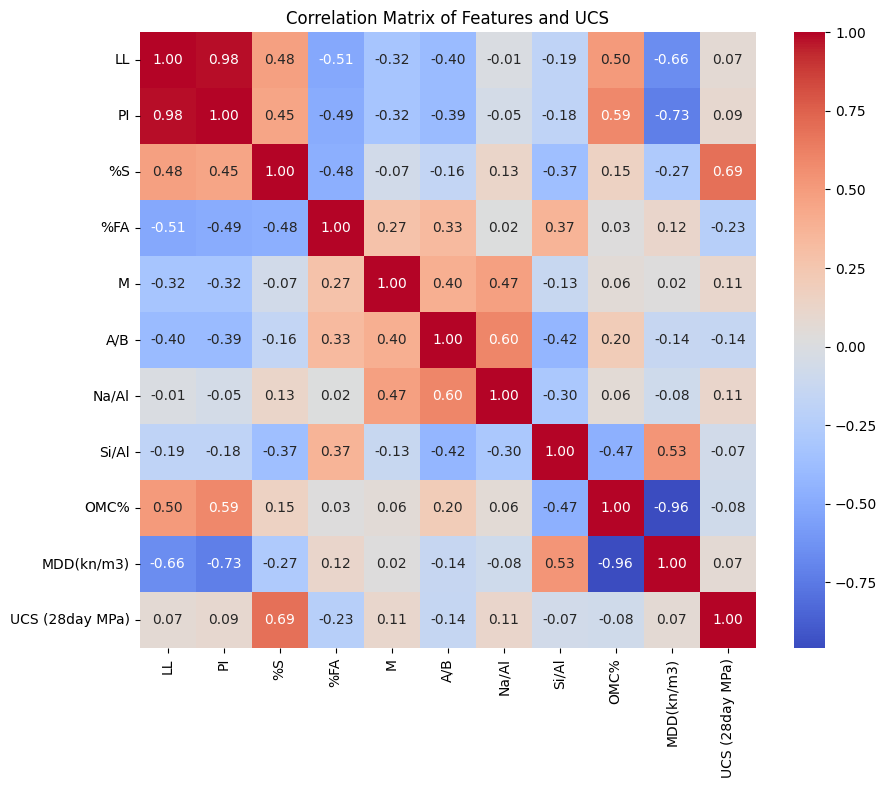


Model Summary:
                            OLS Regression Results                            
Dep. Variable:        UCS (28day MPa)   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     57.67
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           1.27e-56
Time:                        09:44:58   Log-Likelihood:                -512.60
No. Observations:                 237   AIC:                             1047.
Df Residuals:                     226   BIC:                             1085.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -102.4499     18.927    

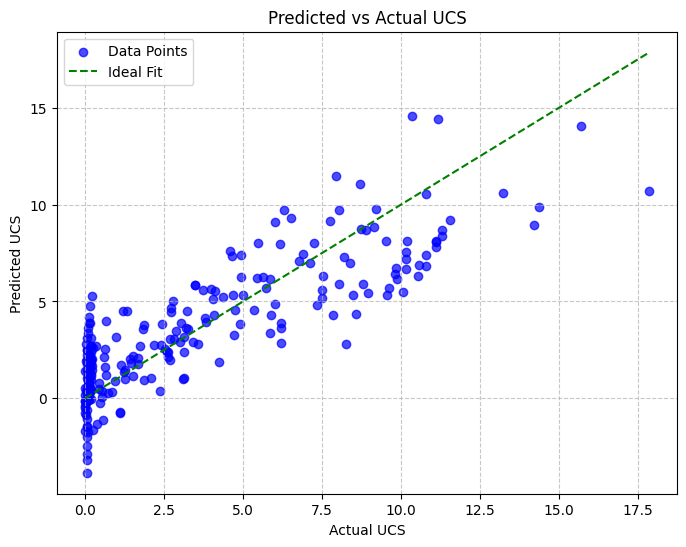

In [ ]:
#Box Plots, Correlation Matrix

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Load the dataset (replace with your file path)
data = pd.read_excel("btpop.xlsx")  # Replace with your dataset path
print("Dataset Loaded Successfully")

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column (UCS)

# Visualize Box Plots of Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title("Box Plot of Input Features")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize Correlation Matrix (including UCS)
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features and UCS")
plt.show()

# Train the MLR model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predict UCS for the entire dataset
y_pred = lr_model.predict(X)

# Display coefficients and stats
X_const = sm.add_constant(X)  # Add constant term for intercept
ols_model = sm.OLS(y, X_const).fit()
print("\nModel Summary:")
print(ols_model.summary())

# Extract coefficients, standard error, t-statistics, and p-values
coefficients = pd.DataFrame({
    "Feature": ["Intercept"] + X.columns.tolist(),
    "Coefficient": [ols_model.params.const] + ols_model.params[1:].tolist(),
    "Std Error": [ols_model.bse.const] + ols_model.bse[1:].tolist(),
    "t-Statistic": [ols_model.tvalues.const] + ols_model.tvalues[1:].tolist(),
    "p-Value": [ols_model.pvalues.const] + ols_model.pvalues[1:].tolist()
})
print("\nModel Coefficients, Standard Errors, t-Statistics, and p-Values:")
print(coefficients)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print("\nModel Performance:")
print(f"  R²: {r2:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  MAE: {mae:.4f}")

# Fit a regression line for predicted vs actual data
reg = LinearRegression()
y_actual_reshaped = y.values.reshape(-1, 1)
reg.fit(y_actual_reshaped, y_pred)
fit_line = reg.predict(y_actual_reshaped)
slope = reg.coef_[0]
intercept = reg.intercept_

# Plot Predicted vs Actual UCS
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, label="Data Points", color="blue")
#plt.plot(y, fit_line, color="red", label=f"Fit Line: y = {slope:.2f}x + {intercept:.2f}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="green", label="Ideal Fit")
plt.title("Predicted vs Actual UCS")
plt.xlabel("Actual UCS")
plt.ylabel("Predicted UCS")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()



In [ ]:
# Dataset Statistics
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('/content/btpop.xlsx')

# Display the first few rows to understand the structure
print("Data Overview:")
print(data.head())

# Optional: Drop or handle any irrelevant columns
# Example: data = data.drop(columns=["irrelevant_column"], axis=1)

# Split the dataset into features and target
# Replace 'target_column_name' with the actual column name
X = data.drop(columns=['UCS (28day MPa)'])  # Input features
y = data['UCS (28day MPa)']  # Target column

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add target column back to training and testing datasets for statistics
train_data = X_train.copy()
train_data['target'] = y_train

test_data = X_test.copy()
test_data['target'] = y_test

# Function to calculate statistical parameters
def calculate_statistics(df):
    stats = {
        "Mean": df.mean(),
        "Standard Deviation": df.std(),
        "Minimum": df.min(),
        "Maximum": df.max(),
        "Range": df.max() - df.min()
    }
    return pd.DataFrame(stats)

# Calculate statistics for training and testing data
train_stats = calculate_statistics(train_data)
test_stats = calculate_statistics(test_data)

# Display the results
print("\nTraining Data Statistics:")
print(train_stats)

print("\nTesting Data Statistics:")
print(test_stats)

# Optionally, save the statistics to Excel
train_stats.to_excel("train_statistics.xlsx")
test_stats.to_excel("test_statistics.xlsx")


Data Overview:
     LL     PI  %S  %FA     M   A/B  Na/Al  Si/Al   OMC%  MDD(kn/m3)  \
0  37.7  14.07   8   12  12.0  0.65   0.49   2.12  19.05      16.562   
1  37.7  14.07   6   10  12.0  0.65   0.49   2.12  19.05      16.562   
2  37.7  14.07   5    7  12.0  0.65   0.49   2.12  19.05      16.562   
3  37.7  14.07   3    5  12.0  0.65   0.49   2.12  19.05      16.562   
4  37.7  14.07   2    2  12.0  0.65   0.49   2.12  19.05      16.562   

   UCS (28day MPa)  
0            5.855  
1            2.597  
2            0.120  
3            0.097  
4            0.053  

Training Data Statistics:
                 Mean  Standard Deviation    Minimum   Maximum      Range
LL          66.768254           31.005885  37.680000  116.0000  78.320000
PI          40.890476           30.347055   5.650000   88.4600  82.810000
%S          10.703704            9.505711   0.000000   50.0000  50.000000
%FA          3.365079            5.708248   0.000000   24.0000  24.000000
M           12.301587        

In [ ]:
pip install statsmodels


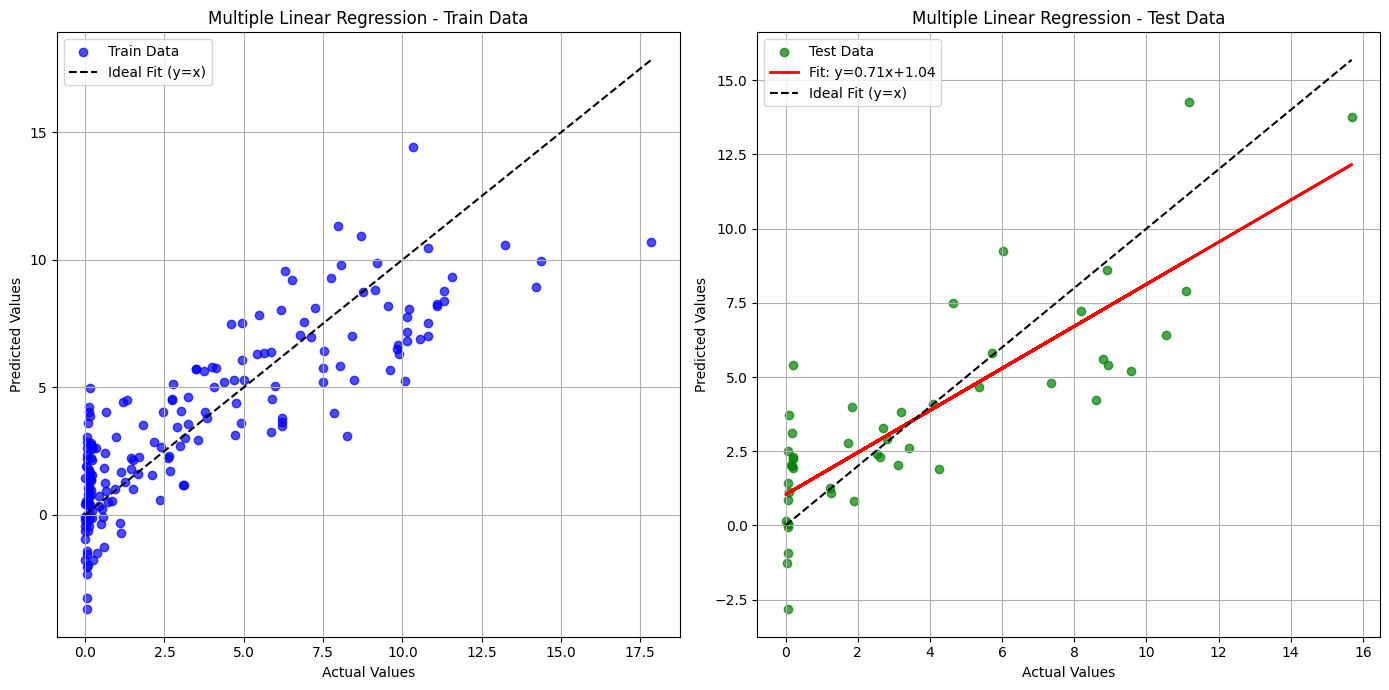

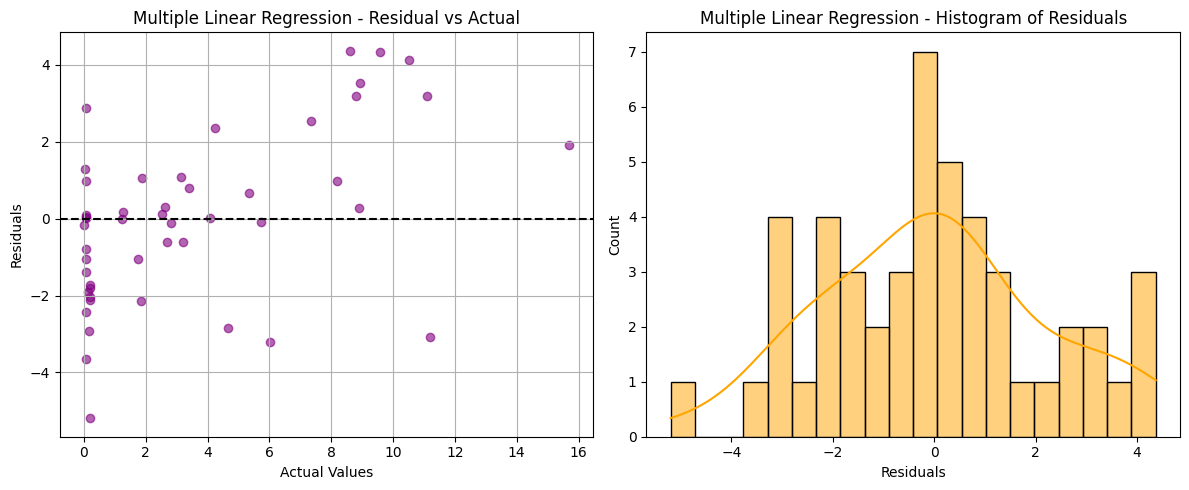

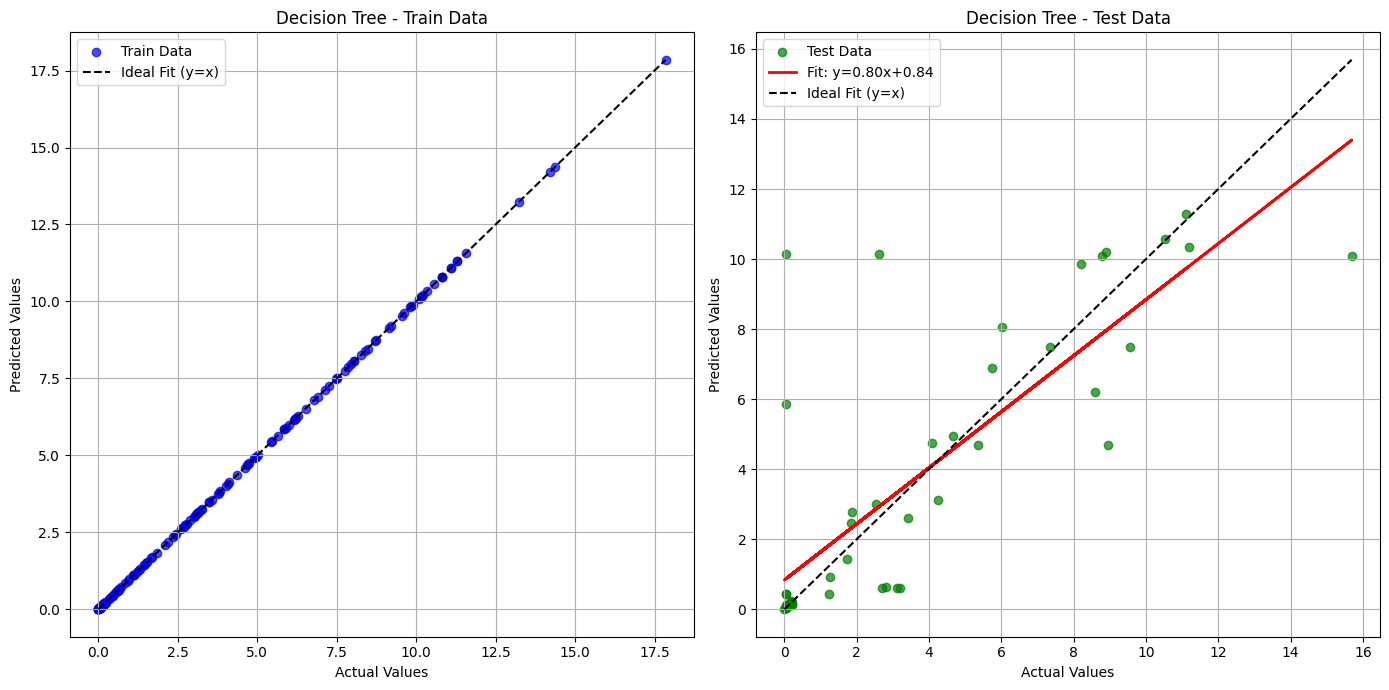

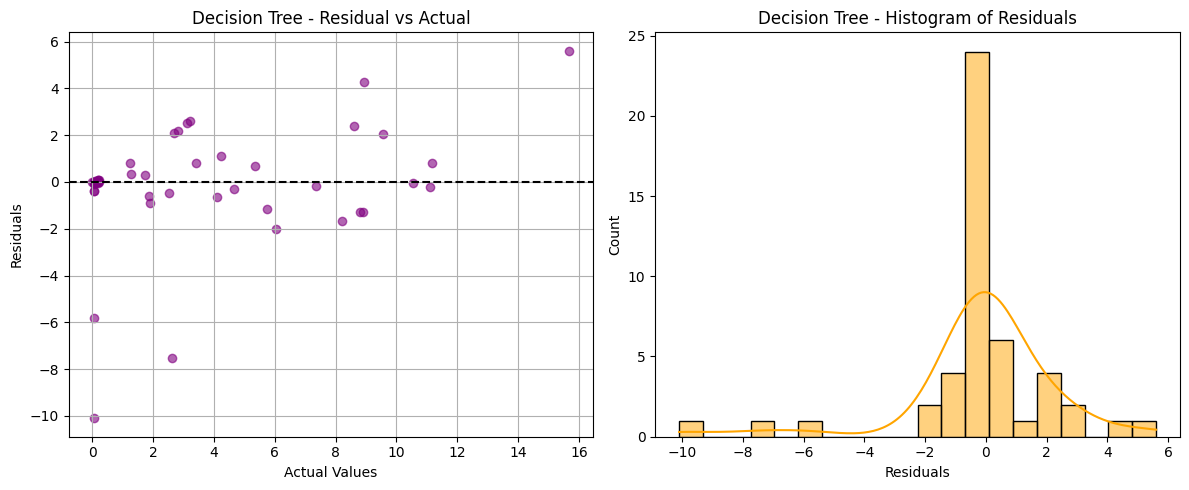

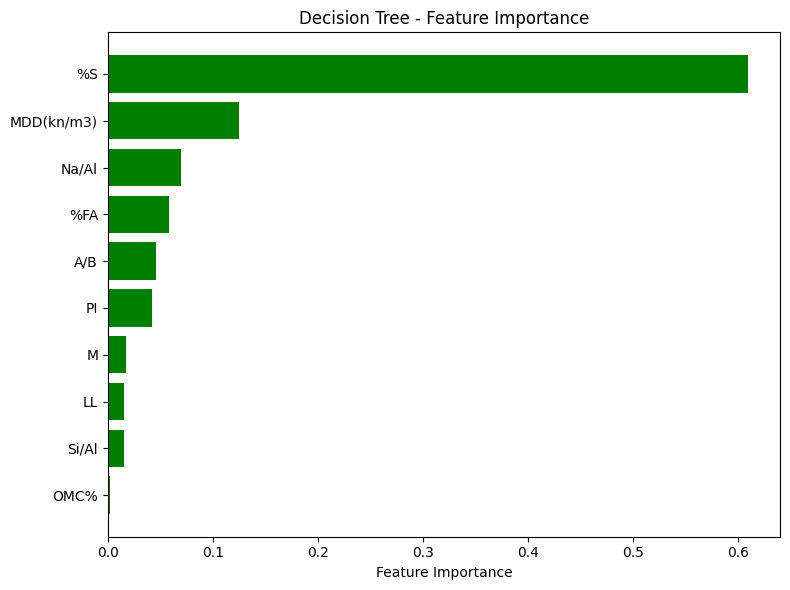

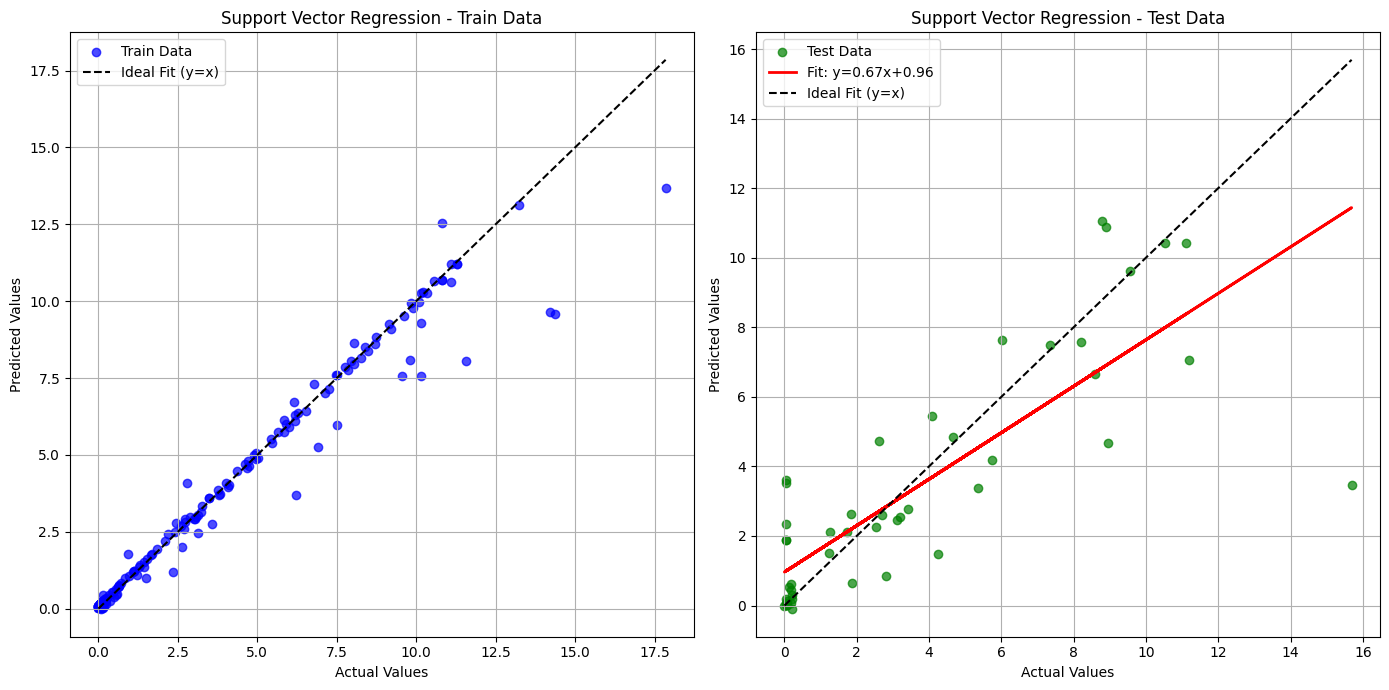

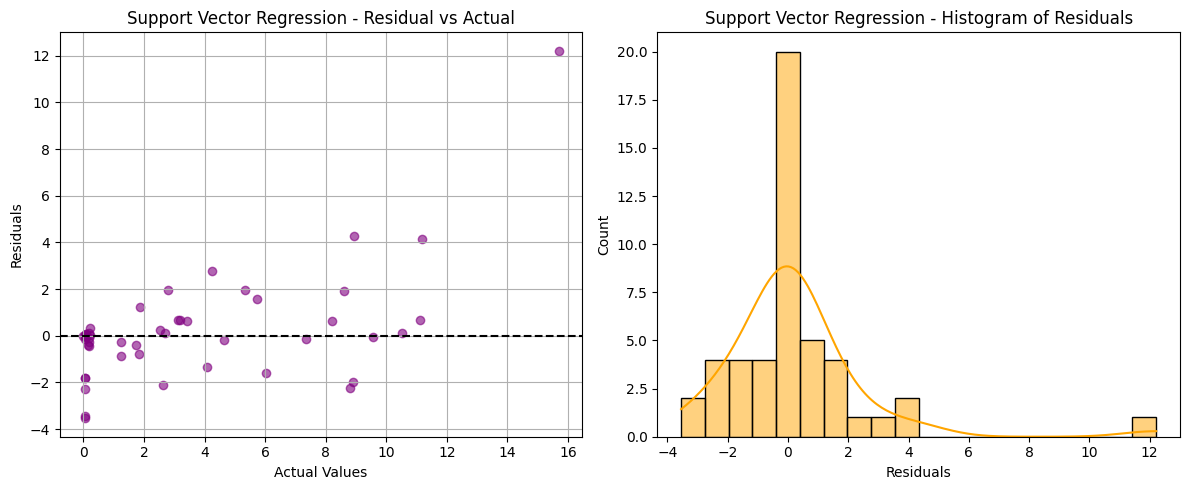

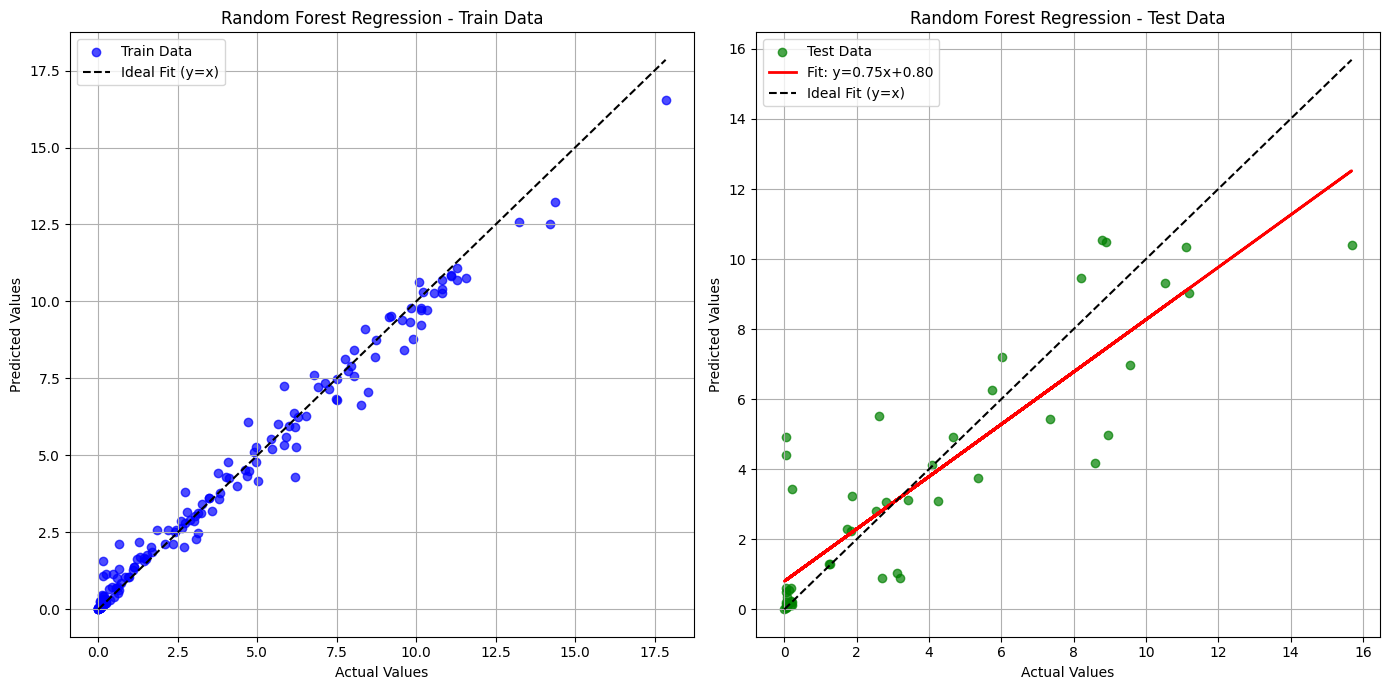

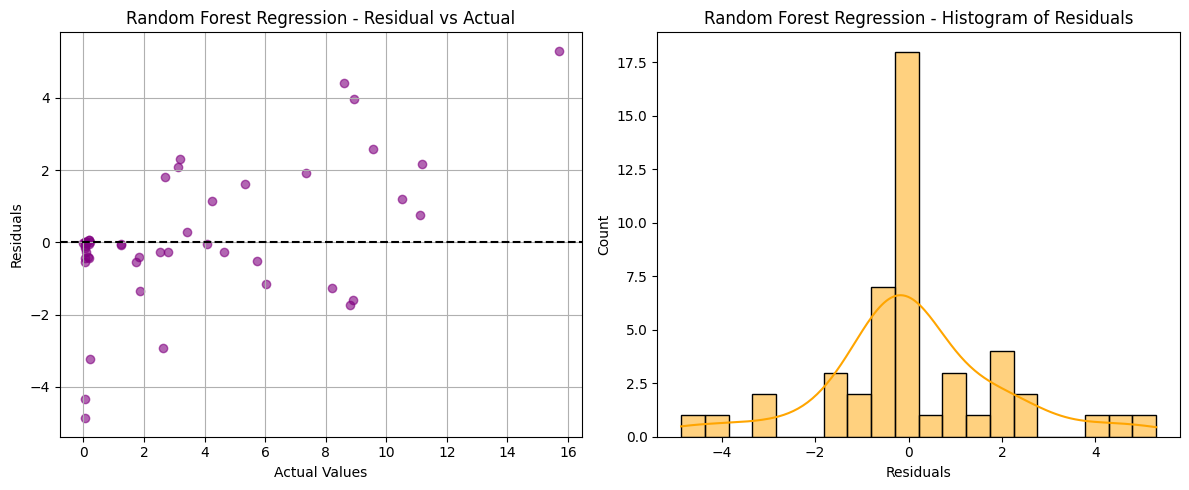

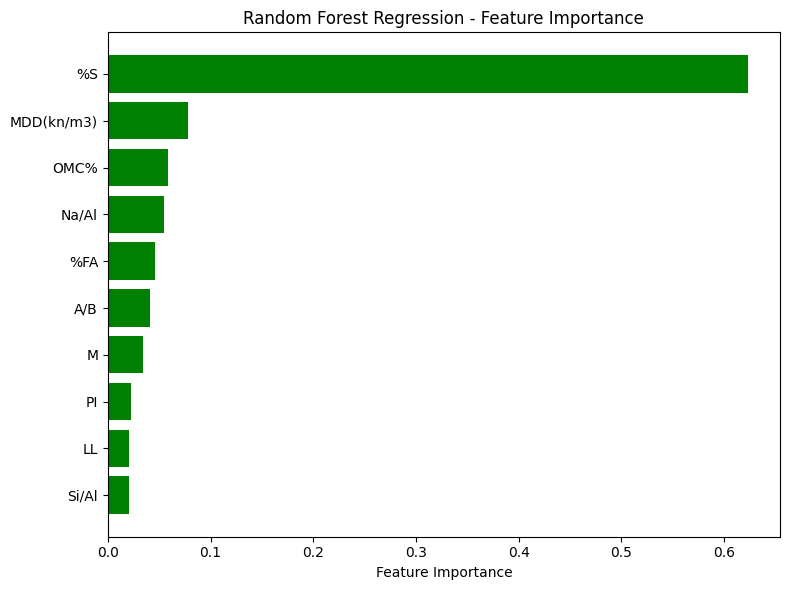


Model Performance Summary:
Multiple Linear Regression:
  R: 0.835
  R² Score: 0.697
  MSE: 4.797
  MAE: 1.692

Decision Tree:
  R: 0.807
  R² Score: 0.615
  MSE: 6.084
  MAE: 1.334

Support Vector Regression:
  R: 0.808
  R² Score: 0.649
  MSE: 5.544
  MAE: 1.306

Random Forest Regression:
  R: 0.881
  R² Score: 0.775
  MSE: 3.558
  MAE: 1.230



In [ ]:
# Mid-Sem (MLR, SVR, DT, RFR)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Load the dataset
data = pd.read_excel('/content/btpop.xlsx')
# Step 1: Prepare data
target_column = "UCS (28day MPa)"  # Replace with your actual target variable
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize models
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r_value, _ = pearsonr(y_test, y_test_pred)

    results[name] = {
        "MSE": mse,
        "MAE": mae,
        "R²": r2,
        "R": r_value
    }

    # Visualization
    plt.figure(figsize=(14, 7))

    # Scatter plot for train data
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7, label='Train Data')

    # Scatter plot for test data
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.7, label='Test Data')

    # Add regression line for applicable models
    coeff = np.polyfit(y_test, y_test_pred, 1)  # Regression coefficients (slope and intercept)
    fit_line = coeff[0] * y_test + coeff[1]
    plt.subplot(1, 2, 2)
    plt.plot(y_test, fit_line, color='red', lw=2, label=f'Fit: y={coeff[0]:.2f}x+{coeff[1]:.2f}')

    # Plot ideal fit line (y = x) for reference
    plt.subplot(1, 2, 1)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', label="Ideal Fit (y=x)")
    plt.subplot(1, 2, 2)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Ideal Fit (y=x)")

    # Titles, labels, and legends
    plt.subplot(1, 2, 1)
    plt.title(f"{name} - Train Data")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.title(f"{name} - Test Data")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


    # --- Residual Plot ---
    residuals = y_test - y_test_pred
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, residuals, color='purple', alpha=0.6)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.title(f"{name} - Residual vs Actual")
    plt.grid()

    plt.subplot(1, 2, 2)
    sns.histplot(residuals, bins=20, kde=True, color='orange')
    plt.title(f"{name} - Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.tight_layout()
    plt.show()

    # --- Feature Importance for Tree-based models ---
    if name in ["Decision Tree", "Random Forest Regression"]:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        features = X.columns

        plt.figure(figsize=(8, 6))
        plt.barh(range(len(importances)), importances[indices], align="center", color='green')
        plt.yticks(range(len(importances)), [features[i] for i in indices])
        plt.xlabel("Feature Importance")
        plt.title(f"{name} - Feature Importance")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# Final metrics
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  R: {metrics['R']:.3f}")
    print(f"  R² Score: {metrics['R²']:.3f}")
    print(f"  MSE: {metrics['MSE']:.3f}")
    print(f"  MAE: {metrics['MAE']:.3f}\n")


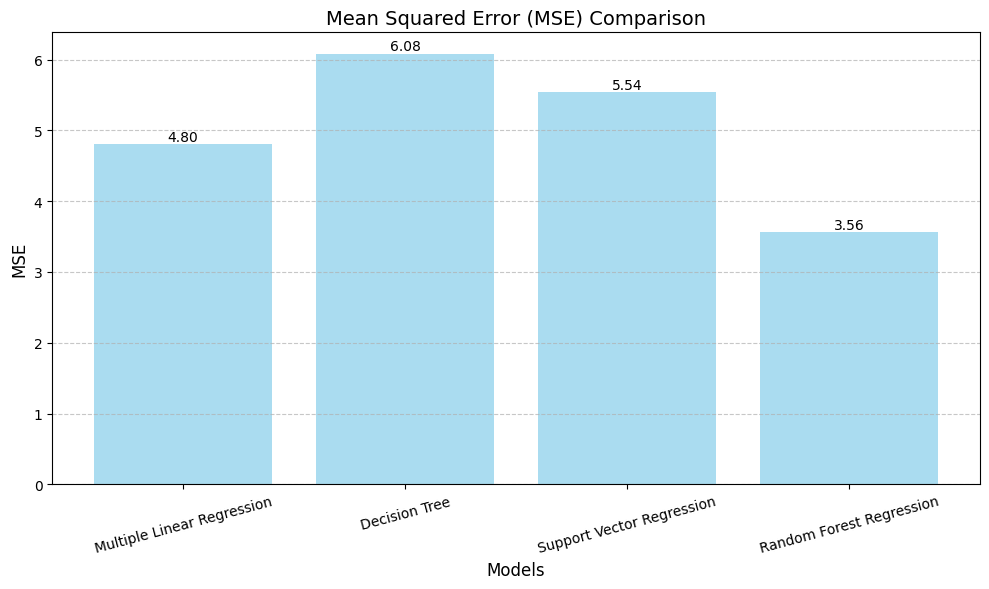

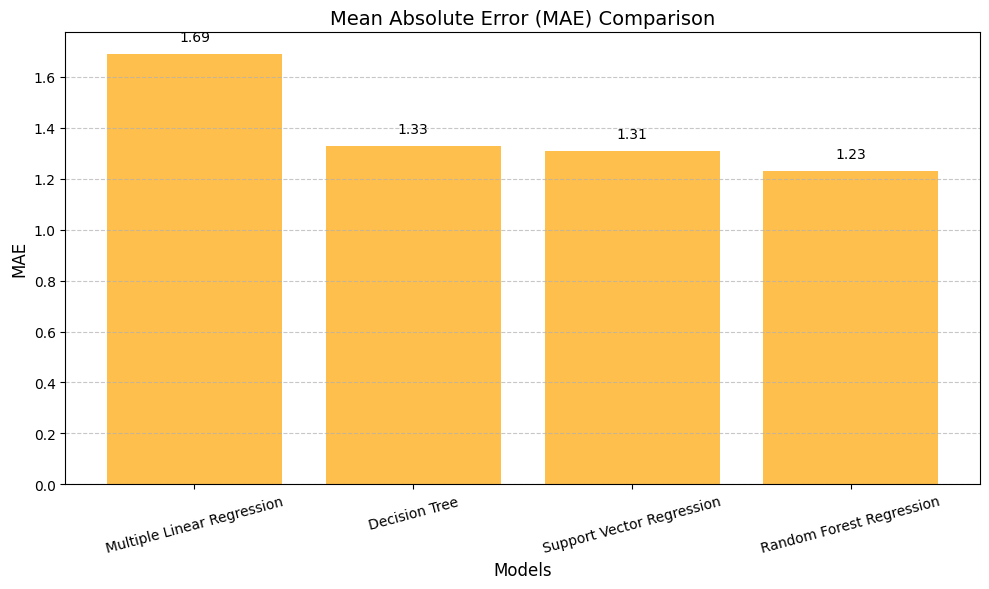

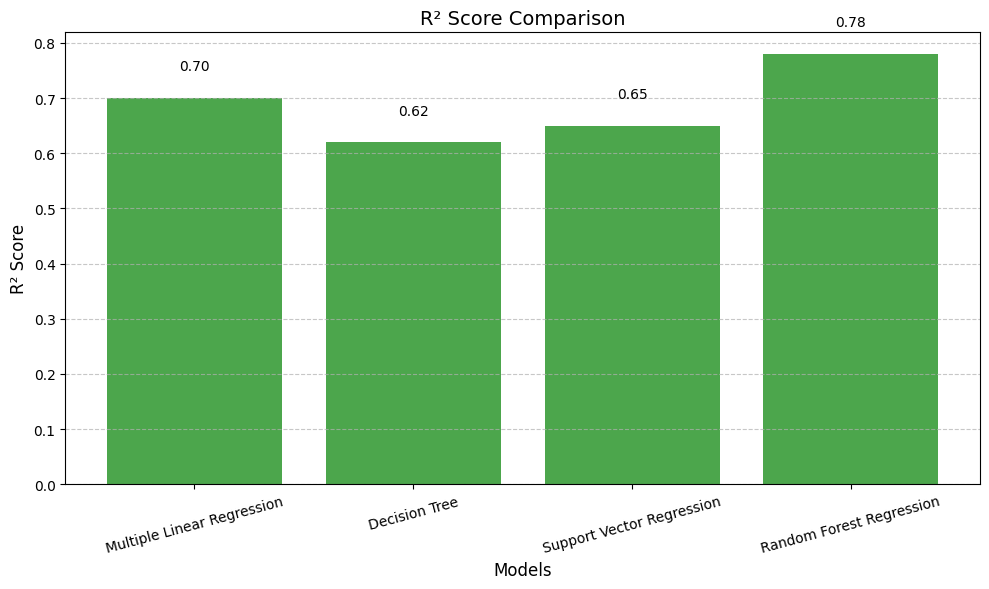

In [ ]:
import matplotlib.pyplot as plt

# Model performance data
models = ["Multiple Linear Regression", "Decision Tree", "Support Vector Regression", "Random Forest Regression"]
mse_values = [4.80, 6.08, 5.54, 3.56]
mae_values = [1.69, 1.33, 1.31, 1.23]
r2_values = [0.70, 0.62, 0.65, 0.78]

# Function to add values on top of bars
def add_values_on_bars(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=10, color='black')

# Plot MSE
plt.figure(figsize=(10, 6))
ax = plt.bar(models, mse_values, color='skyblue', alpha=0.7)
plt.title("Mean Squared Error (MSE) Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_values_on_bars(plt.gca(), mse_values)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
ax = plt.bar(models, mae_values, color='orange', alpha=0.7)
plt.title("Mean Absolute Error (MAE) Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_values_on_bars(plt.gca(), mae_values)
plt.tight_layout()
plt.show()

# Plot R² Score
plt.figure(figsize=(10, 6))
ax = plt.bar(models, r2_values, color='green', alpha=0.7)
plt.title("R² Score Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_values_on_bars(plt.gca(), r2_values)
plt.tight_layout()
plt.show()


Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 21.3579 - mae: 3.1280 - val_loss: 27.1640 - val_mae: 3.5722
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.1067 - mae: 3.5225 - val_loss: 25.8328 - val_mae: 3.4956
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.2477 - mae: 3.1304 - val_loss: 24.5736 - val_mae: 3.4465
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.0698 - mae: 3.8150 - val_loss: 23.3749 - val_mae: 3.4117
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.6910 - mae: 3.2108 - val_loss: 22.3600 - val_mae: 3.3776
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25.8873 - mae: 3.6620 - val_loss: 21.3514 - val_mae: 3.3345
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.9624 - mae: 3.2566 - val_loss: 20.4380 - val_mae: 3.2988
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.7351 - mae: 3.4677 - val_loss: 19.5540 - val_mae: 3.2660
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10

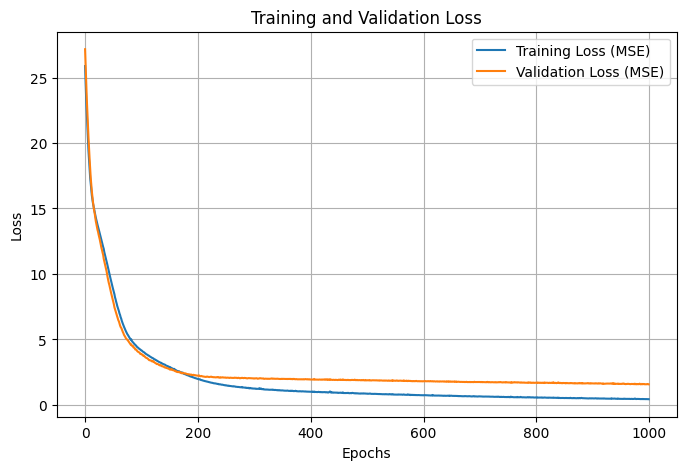

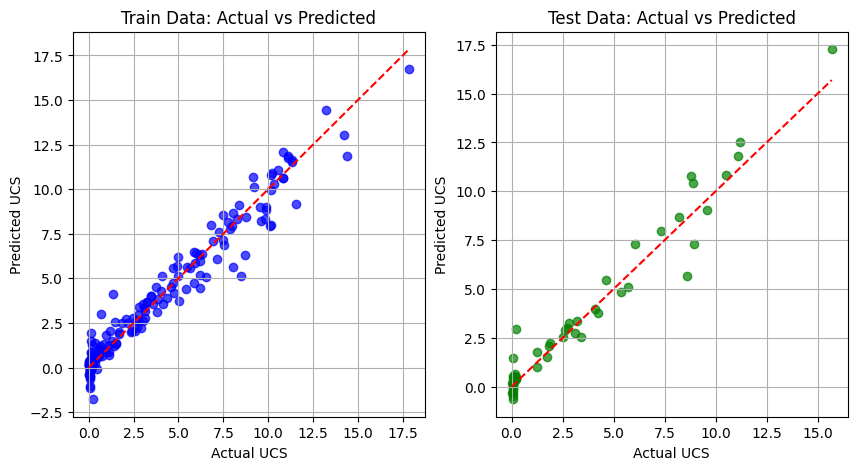

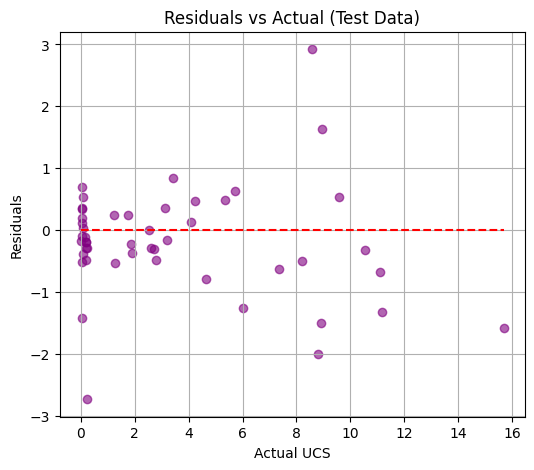

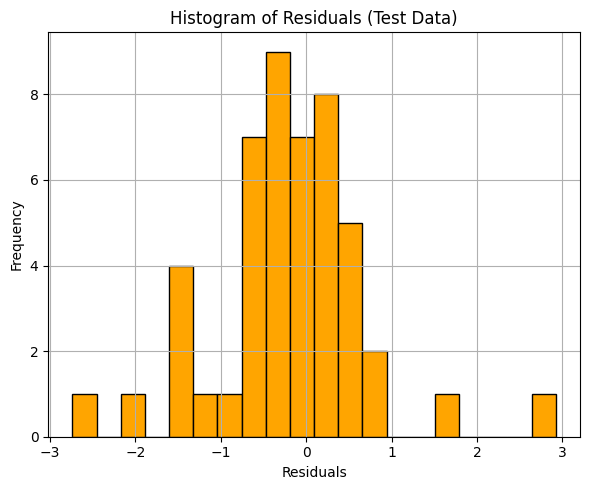

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


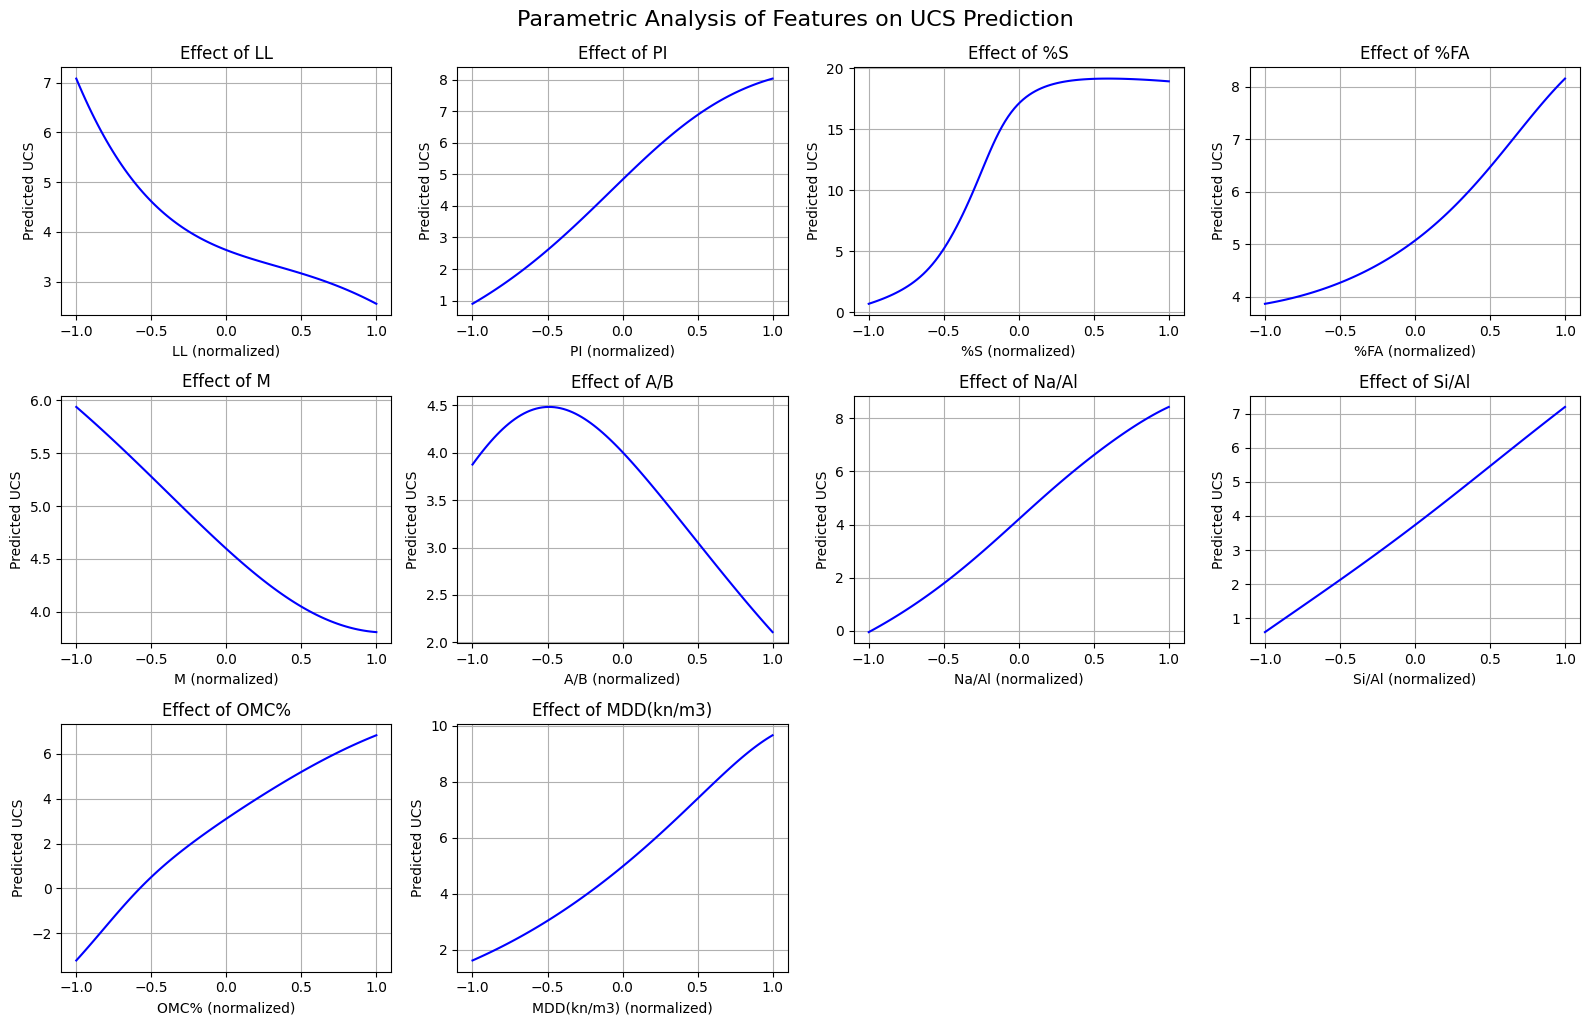

In [ ]:
# 2 Hidden Layer-ANN2
# Best Hyperparameters: {'n_neurons_1': 17, 'n_neurons_2': 37, 'activation': 'tanh', 'learning_rate': 0.0005875550670705051, 'batch_size': 16}

# Install TensorFlow if not already installed
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.optimizers import Adam

# Set learning rate to 0.0005, for example
optimizer = Adam(learning_rate=0.0005)

# Load your dataset
data = pd.read_excel('/content/btpop.xlsx')
# Assuming 'data' variable is already loaded
target_column = "UCS (28day MPa)"  # Output variable

X = data.drop(columns=[target_column])
y = data[target_column]

# Normalize the input features between [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model
model = keras.Sequential([
    layers.Dense(9, activation='tanh', input_shape=(X_train.shape[1],)),  # One hidden layer with 9 neurons
    layers.Dense(1, activation='tanh'),
    layers.Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, verbose=1)

# Predictions
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTrain Set Performance:")
print(f"MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")

print(f"\nTest Set Performance:")
print(f"MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

# Plot Training Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Train Data: Predicted vs Actual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

# Plot Test Data: Predicted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna
!pip install tensorflow

import optuna
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split

# Load and preprocess your dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_excel('/content/btpop.xlsx')
target_column = "UCS (28day MPa)"
X = data.drop(columns=[target_column])
y = data[target_column]

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


def objective(trial):
    # Hyperparameters to tune
    n_neurons_1 = trial.suggest_int('n_neurons_1', 4, 64)
    n_neurons_2 = trial.suggest_int('n_neurons_2', 0, 64)  # 0 = skip second layer
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])

    # Model architecture
    model = keras.Sequential()
    model.add(layers.Dense(n_neurons_1, activation=activation, input_shape=(X_train.shape[1],)))
    if n_neurons_2 > 0:
        model.add(layers.Dense(n_neurons_2, activation=activation))
    model.add(layers.Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Fit model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=1000,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )

    return min(history.history['val_loss'])

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=35)  # Adjust n_trials based on time


[I 2025-04-30 09:18:10,575] A new study created in memory with name: no-name-fbb6ca93-e94a-4700-a7fd-f87931a333ef
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-04-30 09:18:22,139] Trial 0 finished with value: 1.8257735967636108 and parameters: {'n_neurons_1': 20, 'n_neurons_2': 23, 'activation': 'relu', 'learning_rate': 0.009473724906690267, 'batch_size': 16}. Best is trial 0 with value: 1.8257735967636108.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regulariz

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 25.3191 - mae: 3.4382 - val_loss: 25.1200 - val_mae: 3.4357
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.4742 - mae: 3.0356 - val_loss: 20.4986 - val_mae: 3.2086
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 20.7101 - mae: 3.3689 - val_loss: 17.5779 - val_mae: 3.2041
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.3967 - mae: 3.2350 - val_loss: 15.9044 - val_mae: 3.2137
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.7687 - mae: 3.3500 - val_loss: 14.6386 - val_mae: 3.1454
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5438 - mae: 2.9895 - val_loss: 13.6455 - val_mae: 3.0364
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.5372 - mae: 3.1076 - val_loss: 12.8087 - val_mae: 2.9123
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.2811 - mae: 3.0361 - val_loss: 12.0657 - val_mae: 2.7903
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12

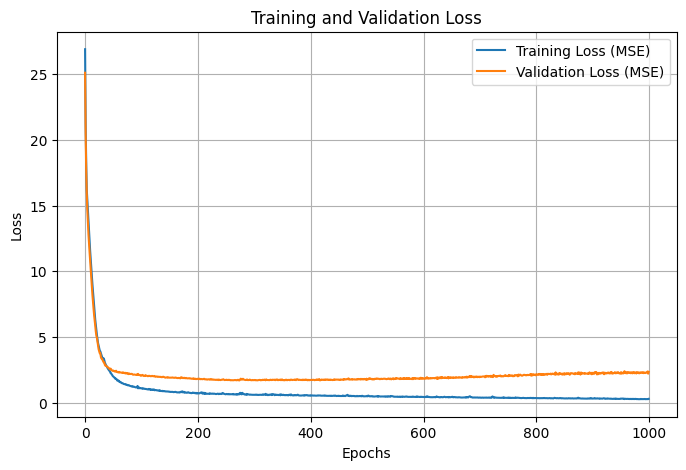

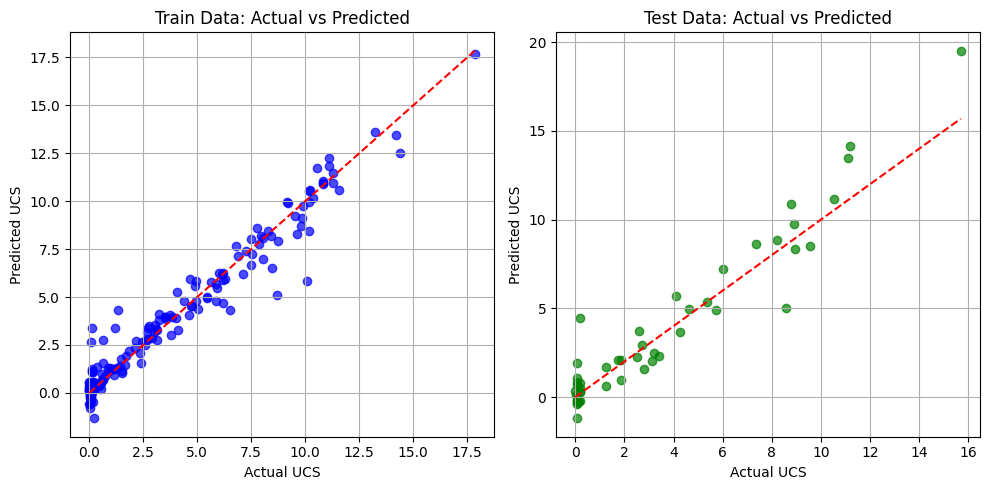

In [ ]:
best_params = study.best_params
#Best Hyperparameters: {'n_neurons_1': 25, 'activation': 'tanh', 'learning_rate': 0.00953111196120957, 'batch_size': 32}
# Build final model
final_model = keras.Sequential()
final_model.add(layers.Dense(best_params['n_neurons_1'], activation=best_params['activation'], input_shape=(X_train.shape[1],)))
if best_params['n_neurons_2'] > 0:
    final_model.add(layers.Dense(best_params['n_neurons_2'], activation=best_params['activation']))
final_model.add(layers.Dense(1, activation='linear'))

optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train final model
history = final_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=best_params['batch_size'],
    #callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
    verbose=1
)

# Evaluate final model
y_train_pred = final_model.predict(X_train).flatten()
y_test_pred = final_model.predict(X_test).flatten()

print("Best Hyperparameters:", best_params)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTrain Set Performance:")
print(f"MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")

print(f"\nTest Set Performance:")
print(f"MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

# Plot Training Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Train Data: Predicted vs Actual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

# Plot Test Data: Predicted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

plt.tight_layout()
plt.show()


Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 25.0701 - mae: 3.2565 - val_loss: 24.5050 - val_mae: 3.4407
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19.9564 - mae: 3.1240 - val_loss: 20.4568 - val_mae: 3.3118
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18.6776 - mae: 3.2914 - val_loss: 17.8397 - val_mae: 3.2258
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 18.0422 - mae: 3.4143 - val_loss: 16.1182 - val_mae: 3.1861
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 15.5927 - mae: 3.2750 - val_loss: 14.9289 - val_mae: 3.1421
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 16.0990 - mae: 3.3545 - val_loss: 13.9889 - val_mae: 3.0417
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.6228 - mae: 3.0914 - val_loss: 13.1414 - val_mae: 2.9395
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 12.4872 - mae: 2.9630 - val_loss: 12.4088 - val_mae: 2.8170
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12

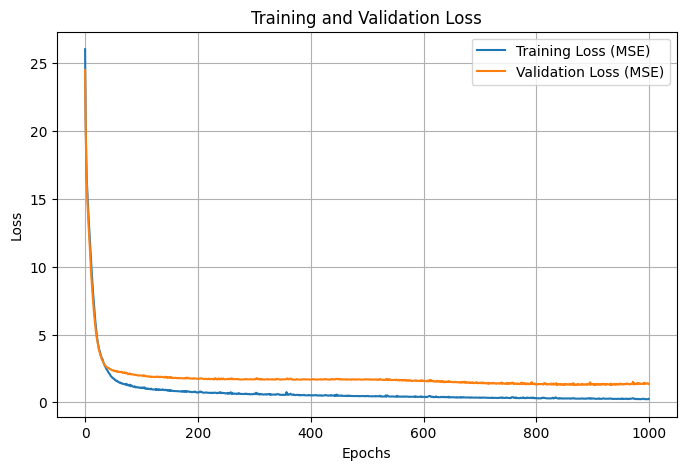

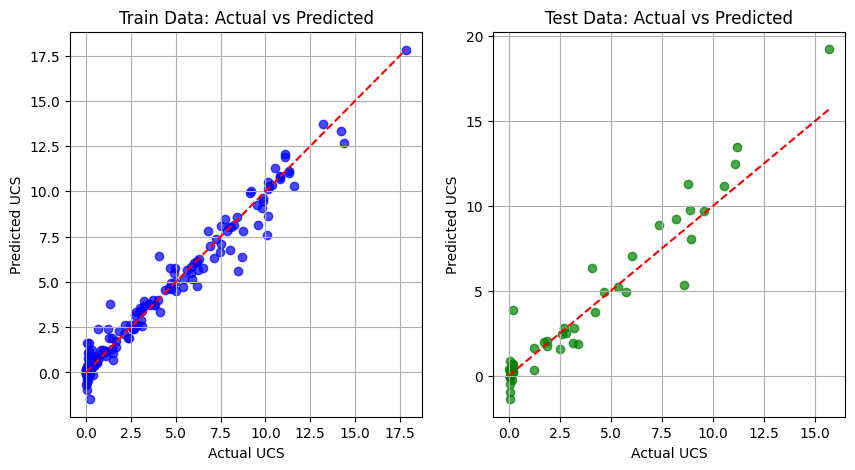

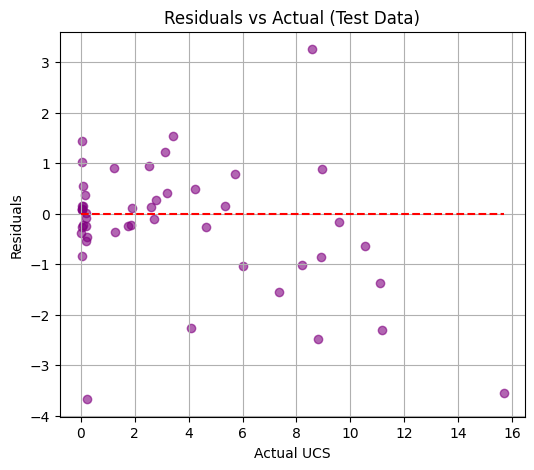

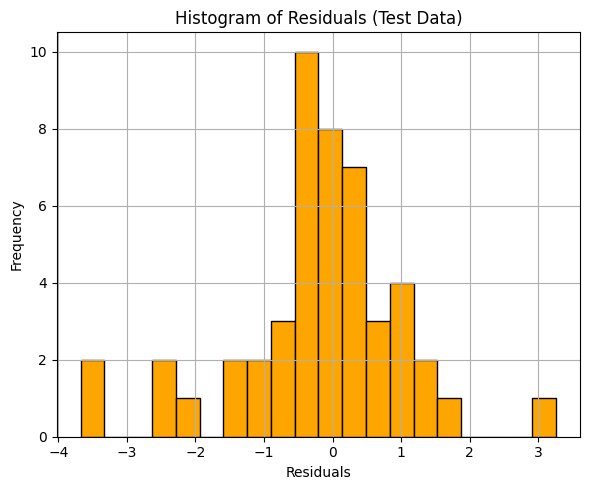

In [ ]:
# 1 Hidden LAYER-ANN1
#Best Hyperparameters: {'n_neurons_1': 25, 'activation': 'tanh', 'learning_rate': 0.00953111196120957, 'batch_size': 32}
# Build final model
final_model = keras.Sequential()
final_model.add(layers.Dense(25, activation='tanh', input_shape=(X_train.shape[1],)))

final_model.add(layers.Dense(1, activation='linear'))

optimizer = Adam(0.00953111196120957)
final_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train final model
history = final_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    #callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
    verbose=1
)

# Evaluate final model
y_train_pred = final_model.predict(X_train).flatten()
y_test_pred = final_model.predict(X_test).flatten()

print("Best Hyperparameters:", best_params)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTrain Set Performance:")
print(f"MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")

print(f"\nTest Set Performance:")
print(f"MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

# Plot Training Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Train Data: Predicted vs Actual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

# Plot Test Data: Predicted vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
#PSO ANN-ANN3
!pip install optuna pyswarms scikit-learn openpyxl


import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pyswarms.single.global_best import GlobalBestPSO

# Load dataset
data = pd.read_excel('/content/btpop.xlsx')
target_column = "UCS (28day MPa)"
X = data.drop(columns=[target_column])
y = data[target_column].values.reshape(-1, 1)

# Scale features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Split dataset (train + val), keep test aside
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

input_dim = X.shape[1]
output_dim = 1

# Forward pass with 2 hidden layers
def forward_pass(X, weights, n1, n2):
    idx = 0

    # Layer 1
    w1_end = idx + input_dim * n1
    w1 = weights[idx:w1_end].reshape(input_dim, n1)
    idx = w1_end
    b1 = weights[idx:idx + n1].reshape(1, n1)
    idx += n1

    # Layer 2
    w2_end = idx + n1 * n2
    w2 = weights[idx:w2_end].reshape(n1, n2)
    idx = w2_end
    b2 = weights[idx:idx + n2].reshape(1, n2)
    idx += n2

    # Output layer
    w3_end = idx + n2 * output_dim
    w3 = weights[idx:w3_end].reshape(n2, output_dim)
    b3 = weights[w3_end:].reshape(1, output_dim)

    h1 = np.tanh(np.dot(X, w1) + b1)
    h2 = np.tanh(np.dot(h1, w2) + b2)
    output = np.dot(h2, w3) + b3
    return output

# Optuna objective
def objective(trial):
    n1 = trial.suggest_int('n_neurons_1', 10, 50)
    n2 = trial.suggest_int('n_neurons_2', 10, 50)
    c1 = trial.suggest_float('c1', 0.5, 2.5)
    c2 = trial.suggest_float('c2', 0.5, 2.5)
    w = trial.suggest_float('w', 0.1, 1.0)
    iters = trial.suggest_int('iters', 300, 800)

    # Total parameters
    num_params = (input_dim * n1) + n1 + (n1 * n2) + n2 + (n2 * output_dim) + output_dim

    def loss_fn(weights):
        losses = []
        for i in range(weights.shape[0]):
            y_pred = forward_pass(X_train, weights[i], n1, n2)
            loss = mean_squared_error(y_train, y_pred)
            losses.append(loss)
        return np.array(losses)

    optimizer = GlobalBestPSO(n_particles=30, dimensions=num_params, options={'c1': c1, 'c2': c2, 'w': w})
    best_cost, best_pos = optimizer.optimize(loss_fn, iters=iters, verbose=False)

    y_val_pred = forward_pass(X_val, best_pos, n1, n2)
    val_mse = mean_squared_error(y_val, y_val_pred)
    return val_mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best trial:")
print(study.best_trial)
print("Best hyperparameters:", study.best_params)


[I 2025-05-03 16:01:34,544] A new study created in memory with name: no-name-eca0eb8a-7a62-42de-8924-6ea5b340f03a
[I 2025-05-03 16:01:53,264] Trial 0 finished with value: 54.60779724178596 and parameters: {'n_neurons_1': 36, 'n_neurons_2': 38, 'c1': 1.88072080372609, 'c2': 1.0649091582958075, 'w': 0.29666327623281197, 'iters': 411}. Best is trial 0 with value: 54.60779724178596.
[I 2025-05-03 16:02:05,852] Trial 1 finished with value: 273.5463435148699 and parameters: {'n_neurons_1': 19, 'n_neurons_2': 49, 'c1': 1.9090646371584996, 'c2': 0.6746558735975923, 'w': 0.15443548606751076, 'iters': 316}. Best is trial 0 with value: 54.60779724178596.
[I 2025-05-03 16:02:25,376] Trial 2 finished with value: 11.629821433934223 and parameters: {'n_neurons_1': 36, 'n_neurons_2': 47, 'c1': 1.8917973455256862, 'c2': 0.6549874069281969, 'w': 0.5282092659224072, 'iters': 414}. Best is trial 2 with value: 11.629821433934223.
[I 2025-05-03 16:02:41,079] Trial 3 finished with value: 17.227350022803435 a

Best trial:
FrozenTrial(number=17, state=1, values=[1.780286589626872], datetime_start=datetime.datetime(2025, 5, 3, 16, 8, 0, 551509), datetime_complete=datetime.datetime(2025, 5, 3, 16, 8, 27, 896887), params={'n_neurons_1': 43, 'n_neurons_2': 29, 'c1': 2.096253905415239, 'c2': 1.5909866741421457, 'w': 0.43607225865901, 'iters': 643}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_neurons_1': IntDistribution(high=50, log=False, low=10, step=1), 'n_neurons_2': IntDistribution(high=50, log=False, low=10, step=1), 'c1': FloatDistribution(high=2.5, log=False, low=0.5, step=None), 'c2': FloatDistribution(high=2.5, log=False, low=0.5, step=None), 'w': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'iters': IntDistribution(high=800, log=False, low=300, step=1)}, trial_id=17, value=None)
Best hyperparameters: {'n_neurons_1': 43, 'n_neurons_2': 29, 'c1': 2.096253905415239, 'c2': 1.5909866741421457, 'w': 0.43607225865901, 'iters': 643}



Train Set Performance:
MSE: 2.28, MAE: 1.15, R²: 0.85

Test Set Performance:
MSE: 5.32, MAE: 1.76, R²: 0.66


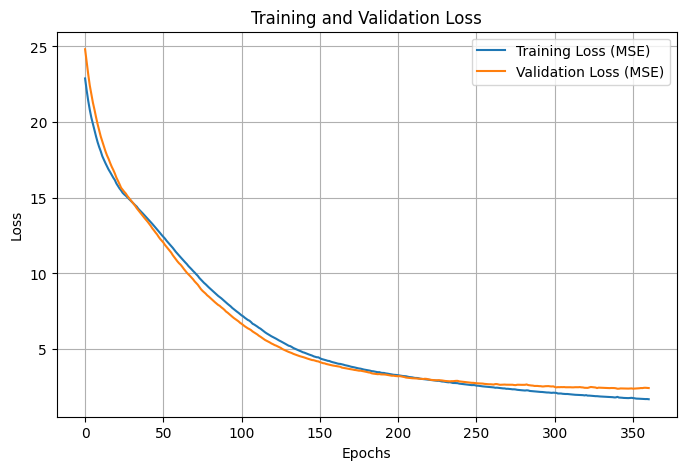

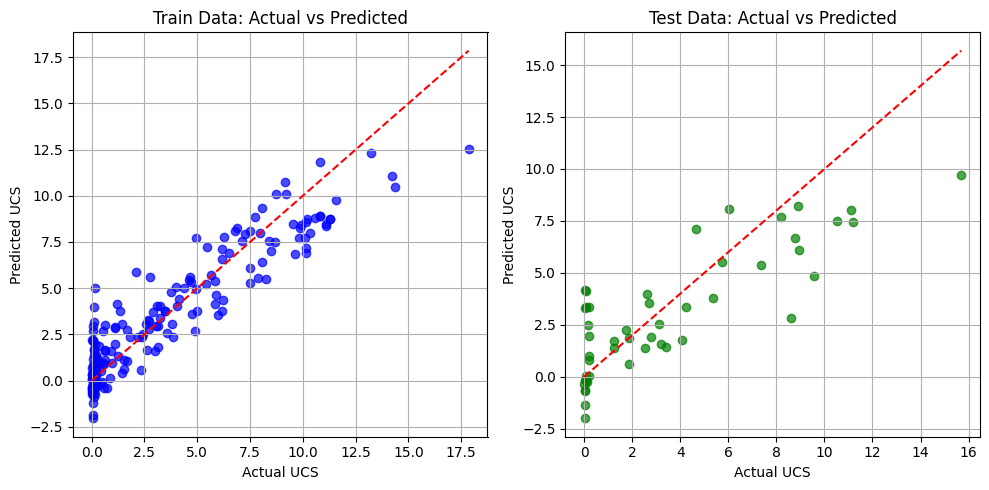

In [ ]:
# Get the best hyperparameters
best_params = study.best_params
n1 = best_params['n_neurons_1']
n2 = best_params['n_neurons_2']
c1 = best_params['c1']
c2 = best_params['c2']
w = best_params['w']
iters = best_params['iters']

# Recompute number of parameters
num_params = (input_dim * n1) + n1 + (n1 * n2) + n2 + (n2 * output_dim) + output_dim

# Define loss for training
def loss_fn(weights):
    losses = []
    for i in range(weights.shape[0]):
        y_pred = forward_pass(X_train, weights[i], n1, n2)
        loss = mean_squared_error(y_train, y_pred)
        losses.append(loss)
    return np.array(losses)

# Optimize using best hyperparams
optimizer = GlobalBestPSO(n_particles=30, dimensions=num_params, options={'c1': c1, 'c2': c2, 'w': w})
best_cost, best_pos = optimizer.optimize(loss_fn, iters=iters, verbose=False)

# Predict
y_train_pred = forward_pass(X_train, best_pos, n1, n2)
y_test_pred = forward_pass(X_test, best_pos, n1, n2)

# Metrics
from sklearn.metrics import mean_absolute_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTrain Set Performance:")
print(f"MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")

print("\nTest Set Performance:")
print(f"MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Genetic Programming for Symbolic Regression

!pip install gplearn
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

df = pd.read_excel("btpop.xlsx")  # You loaded UCS data
X = df.drop(columns=["UCS (28day MPa)"])
y = df["UCS (28day MPa)"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

est_gp = SymbolicRegressor(
    population_size=500,
    generations=900,
    function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'sin', 'cos'],
    p_crossover=0.80,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.05,
    tournament_size=25,
    const_range=(-10, 10),
    init_depth=(2, 6),
    parsimony_coefficient=0.001,
    verbose=1,
    random_state=42
)

est_gp.fit(X_train, y_train)

y_pred = est_gp.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

print(est_gp._program)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.73          7.26369       17          2.89535              N/A     13.12m
   1     9.24          3.84747       25          2.63225              N/A     11.65m
   2    14.67          3.49647       25          2.29572              N/A     11.65m
   3    20.52            3.489       27          2.28937              N/A     12.38m
   4    24.94          3.68829       34          2.25627              N/A     12.10m
   5    26.58          4.12232       26          2.17822              N/A     12.17m
   6    26.19          4.00144       57          2.11151              N/A     12.52m
   7    29.23          3.65499       36          2.08992              N/A     12.86m
   8    38.30          3.69251       40           2.0535              N/A  